In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("41467_2022_28074_MOESM6_ESM/Source Data/maintext/figure-2a.tsv", sep="\t", header=None)
df.columns=["valves","position", "read_depth"]
df  = df.groupby('valves',as_index=False).agg({'position':lambda x: list(x), 'read_depth':lambda x: list(x)})

In [3]:
#32,35,
cl,cu = [],[]
il, iu = [],[]
tl,tu = [],[]
sequences = []


for valve in df.valves:
    gff = pd.read_csv("41467_2022_28074_MOESM3_ESM/figure_3_valve_library/_gff/" + valve+ ".gff", "\t",header=None)
    
    c = gff[gff.iloc[:,8]=='Name='+valve.split('-')[0]]
    cl.append(c.iloc[0,3])
    cu.append(c.iloc[0,4])
    
    i = gff[gff.iloc[:,8]=='Name='+valve.split('-')[1]]
    il.append(i.iloc[0,3])
    iu.append(i.iloc[0,4])
    
    t = gff[gff.iloc[:,8]=='Name='+valve.split('-')[2]]
    tl.append(t.iloc[0,3])
    tu.append(t.iloc[0,4])
    
    sequences.append(pd.read_csv("41467_2022_28074_MOESM3_ESM/figure_3_valve_library/_plasmids/" + valve+ ".fasta", "\t",header=None).iloc[1,0])
    
df['cl'], df['cu'] = cl, cu
df['il'], df['iu'] = il, iu
df['tl'], df['tu'] = tl, tu
df['seq'] = sequences

In [4]:
profile_length = 45

In [5]:
tprofiles = []
tsequences = []
isequences = []
csequences = []

for i in range(len(df)):
    tprofile = df.read_depth[i][df.tl[i]:df.tu[i]+10]
    tprofile = np.array(tprofile) / tprofile[0]
    tprofiles.append(tprofile[-profile_length:])
    
    tsequences.append(df.seq[i][df.tl[i]:df.tu[i]+10])
    isequences.append(df.seq[i][df.il[i]:df.iu[i]])
    csequences.append(df.seq[i][df.cl[i]:df.cu[i]])
df['tprofile']=tprofiles
df['tseq']=tsequences
df['iseq']=isequences
df['cseq']=csequences

In [6]:
valves = df.iloc[:,0]
valves = np.array([valve.split("-") for valve in valves])
df["c"] = valves[:,0]
df["i"] = valves[:,1]
df["t"] = valves[:,2]

dc = dict(zip(np.unique(df.c),range(len(np.unique(df.c)))))
df['c_idx'] = [dc[df.c[i]] for i in range(len(df))]

di = dict(zip(np.unique(df.i),range(len(np.unique(df.i)))))
df['i_idx'] = [di[df.i[i]] for i in range(len(df))]

dt = dict(zip(np.unique(df.t),range(len(np.unique(df.t)))))
df['t_idx'] = [dt[df.t[i]] for i in range(len(df))]

In [7]:
len(np.unique(df.c)), len(np.unique(df.c_idx))

(7, 7)

In [8]:
len(np.unique(df.i)), len(np.unique(df.i_idx))

(13, 13)

In [9]:
len(np.unique(df.t)), len(np.unique(df.t_idx))

(13, 13)

In [10]:
df = df[['c','c_idx','cseq','i','i_idx','iseq','t','t_idx','tseq','tprofile']]

In [11]:
ni,nt,nc = np.max(df.i_idx)+1,np.max(df.t_idx)+1,np.max(df.c_idx)+1
ni,nt,nc

(13, 13, 7)

In [12]:
Ts = np.unique(df.t)

T10
CUGAUGCCAGAAAGGGUCCUGAAUUUCAGGGCCCUUUUUUUACAUGGAUUGACUAGUAGCG


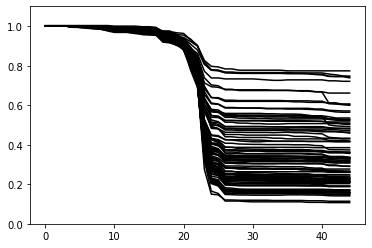

T12
CUGAUUUUUAAGGCGACUGAUGAGUCGCCUUUUUUUUGUCUACUAGUAGCG


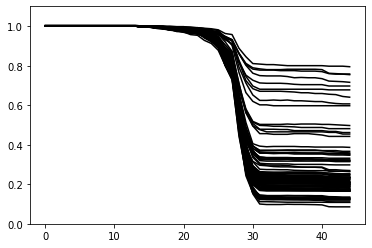

T13
GUUAACCAAAAAGGGGGGAUUUUAUCUCCCCUUUAAUUUUUCCUACUAGUAGCG


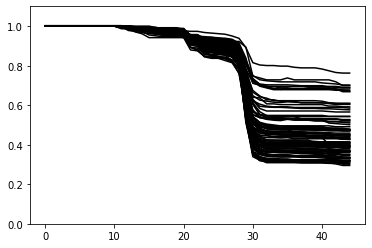

T14
GUGUUCCUGAACGCCCGCAUAUGCGGGCGUUUUGCUUUUUGACUAGUAGCG


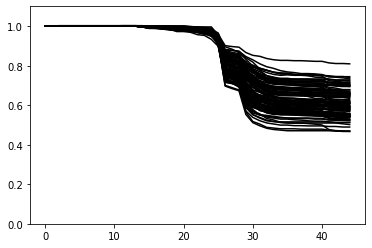

T15
CUGAAUGCGUGCCCAUUCCUGACGGAAUGGGCAUUUCUGCGCAACUAGUAGCG


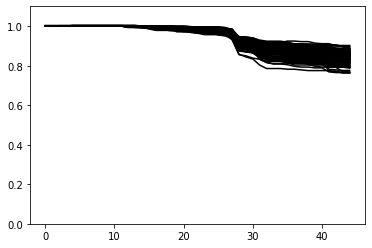

T16
UUAUUAAAUAGCCUGCCAUCUGGCAGGCUUUUUUUAUCGACUAGUAGCG


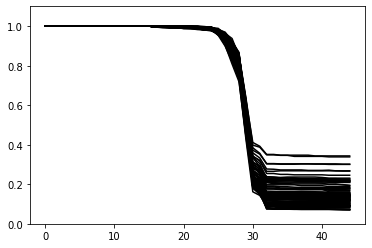

T17
GUCUGCGUAUGGAACGUGGUAACGGUUCUACUGAAGAUUUACUAGUAGCG


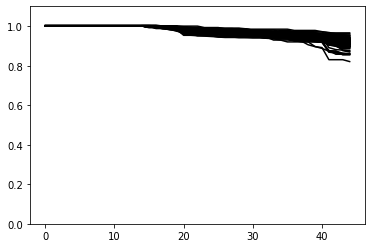

T18
ACUUCUUACUCGCCCAUCUGCAACGGAUGGGCGAAUUUAUACCCACUAGUAGCG


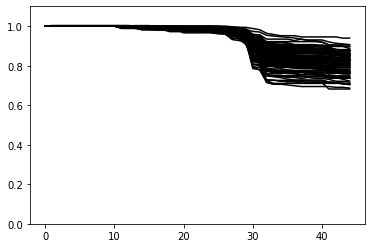

T20
UGAAAUAUCCAGCGGAUCAAGAAAAUUCGUUGGAUAUUUUUUACUAGUAGCG


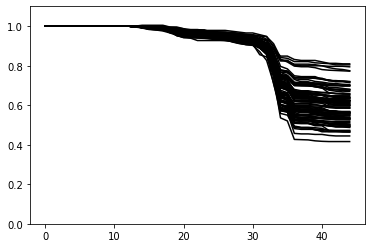

T21
AACACGUAGGCCUGAUAAGCGAAGCGCAUCAGGCAGUUUUGCGUACUAGUAGCG


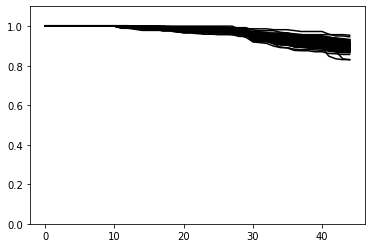

T27
UUCAGCAAAAAACCCCUCAAGACCCGUUUAGAGGCCCCAAGGGGUUAUGCUAGGACUAGUAGCG


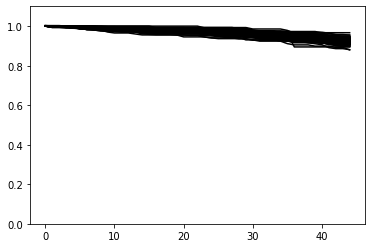

T29
AGAAAUCAUCCUUAGCGAAAGCUAAGGAUUUUUUUUAUCUGAAACUAGUAGCG


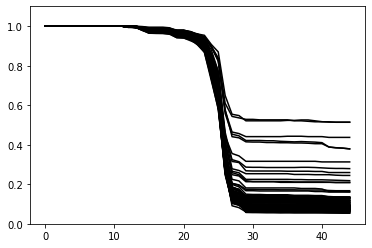

T33
AGCGUUGAACCUACGACAGUCUCUUAUUGACGAGUAAAGUGCUACUAGUAGCG


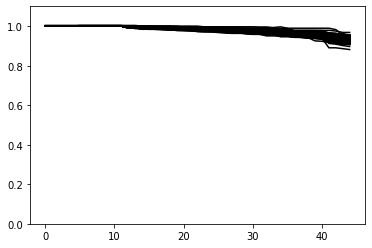

In [13]:
for T in Ts:
    print(T)
    df_ = df[df.t==T]
    seqs = np.unique(df_.tseq)
    assert len(seqs)==1
    print(seqs[0])
    plt.figure()
    for i in range(len(df_)):
        plt.plot(df_.tprofile.iloc[i][:],c='k')
    plt.ylim(0,1.1)
    plt.show()
    plt.close()

T10
CUGAUGCCAGAAAGGGUCCUGAAUUUCAGGGCCCUUUUUUUACAUGGAUUGACUAGUAGCG


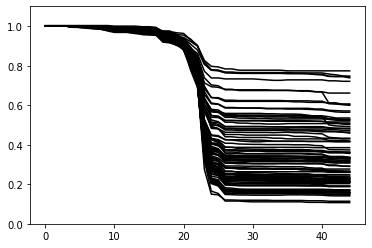

T12
CUGAUUUUUAAGGCGACUGAUGAGUCGCCUUUUUUUUGUCUACUAGUAGCG


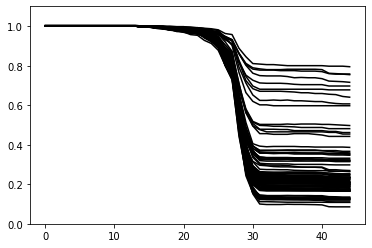

T13
GUUAACCAAAAAGGGGGGAUUUUAUCUCCCCUUUAAUUUUUCCUACUAGUAGCG


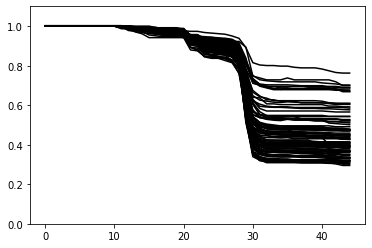

T14
GUGUUCCUGAACGCCCGCAUAUGCGGGCGUUUUGCUUUUUGACUAGUAGCG


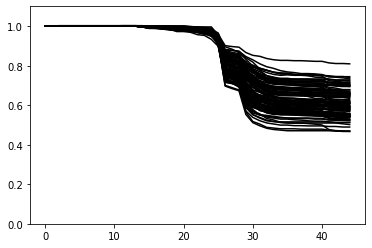

T15
CUGAAUGCGUGCCCAUUCCUGACGGAAUGGGCAUUUCUGCGCAACUAGUAGCG


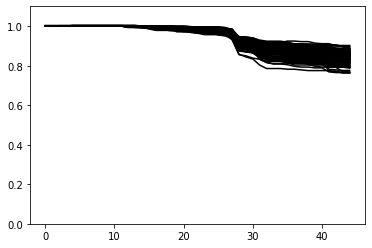

T16
UUAUUAAAUAGCCUGCCAUCUGGCAGGCUUUUUUUAUCGACUAGUAGCG


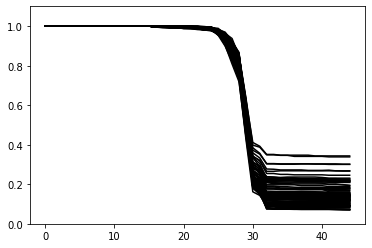

T17
GUCUGCGUAUGGAACGUGGUAACGGUUCUACUGAAGAUUUACUAGUAGCG


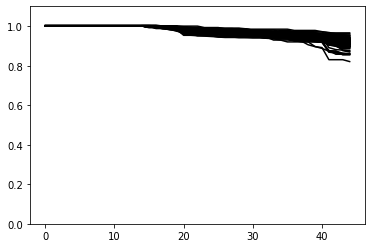

T18
ACUUCUUACUCGCCCAUCUGCAACGGAUGGGCGAAUUUAUACCCACUAGUAGCG


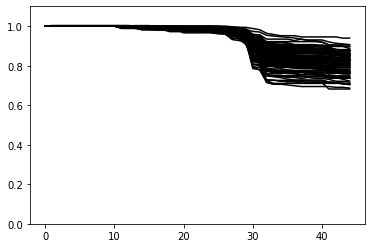

T20
UGAAAUAUCCAGCGGAUCAAGAAAAUUCGUUGGAUAUUUUUUACUAGUAGCG


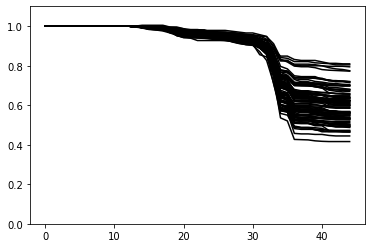

T21
AACACGUAGGCCUGAUAAGCGAAGCGCAUCAGGCAGUUUUGCGUACUAGUAGCG


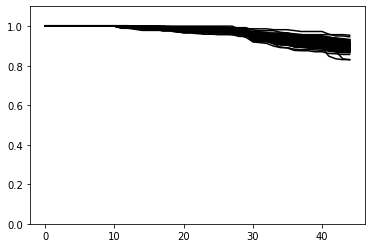

T27
UUCAGCAAAAAACCCCUCAAGACCCGUUUAGAGGCCCCAAGGGGUUAUGCUAGGACUAGUAGCG


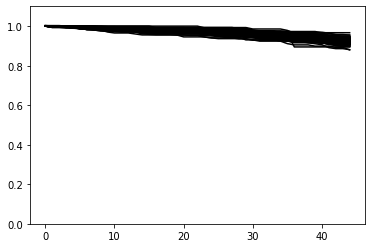

T29
AGAAAUCAUCCUUAGCGAAAGCUAAGGAUUUUUUUUAUCUGAAACUAGUAGCG


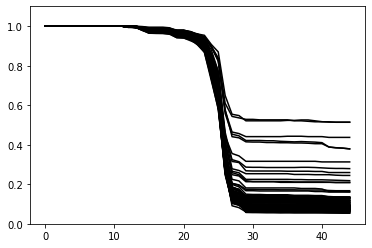

T33
AGCGUUGAACCUACGACAGUCUCUUAUUGACGAGUAAAGUGCUACUAGUAGCG


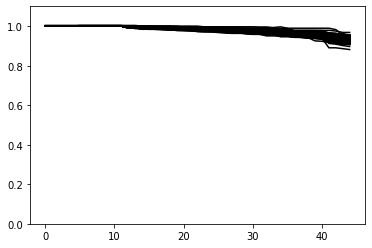

In [14]:
for T in Ts:
    print(T)
    df_ = df[df.t==T]
    seqs = np.unique(df_.tseq)
    assert len(seqs)==1
    print(seqs[0])
    plt.figure()
    for i in range(len(df_)):
        plt.plot(df_.tprofile.iloc[i][:],c='k')
    plt.ylim(0,1.1)
    plt.show()
    plt.close()

In [17]:
Y = np.nan+np.zeros((ni,nc,nt,profile_length))
for i in range(len(df)):
    for j in range(profile_length):
        Y[df.i_idx[i], df.c_idx[i], df.t_idx[i], j] = df.tprofile[i][j]

In [18]:
#from kmer import kmer_featurization

In [19]:
from Bio import pairwise2
from Bio import Align

In [20]:
def computeK(sequences,match_score,mismatch_score, internal_gap_score):
    aligner = Align.PairwiseAligner()
    aligner.mode = 'local'
    aligner.match_score = match_score
    aligner.mismatch_score = mismatch_score
    aligner.internal_gap_score = internal_gap_score
    K = np.zeros((len(sequences),len(sequences)))
    for i in range(len(sequences)):
        for j in range(i,len(sequences)):
            r =aligner.score(sequences[i],sequences[j]) / min(len(sequences[i]),len(sequences[j]))
            K[i,j]=r
            K[j,i]=r
    return (K - K.min()) / (K.max() - K.min())

In [21]:
X_i = df[['i_idx','iseq']].drop_duplicates().sort_values('i_idx')[['iseq']]
X_c = df[['c_idx','cseq']].drop_duplicates().sort_values('c_idx')[['cseq']]
X_t = df[['t_idx','tseq']].drop_duplicates().sort_values('t_idx')[['tseq']]

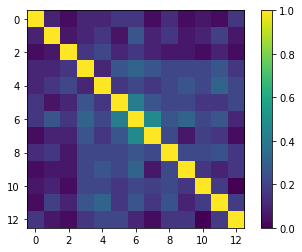

In [22]:
K_i = computeK(list(X_i.iseq),1,-1,-1)
plt.imshow(K_i)
plt.colorbar()

In [23]:
np.sum(K_i,axis=1)

array([2.1003003 , 2.4026754 , 2.11165711, 3.38787879, 3.33535354,
       3.38787879, 4.17575758, 3.04291564, 3.31122031, 2.85410865,
       2.72689053, 3.17723178, 2.46568387])

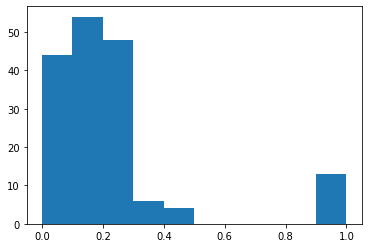

In [24]:
plt.hist(K_i.flatten())
plt.show()

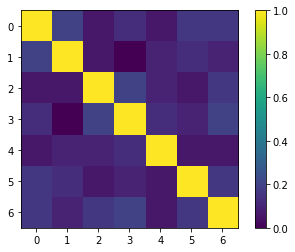

In [25]:
K_c = computeK(list(X_c.cseq),1,-1,-1)
plt.imshow(K_c)
plt.colorbar()

In [26]:
np.sum(K_c,axis=1)

array([1.77419355, 1.58064516, 1.64516129, 1.74193548, 1.51612903,
       1.67741935, 1.83870968])

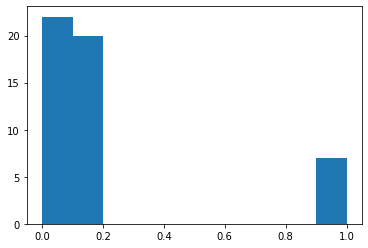

In [27]:
plt.hist(K_c.flatten())
plt.show()

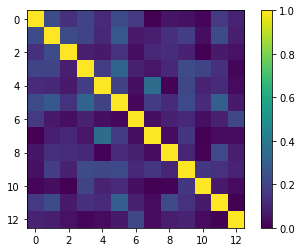

In [28]:
K_t = computeK(list(X_t.tseq),1,-1,-1)
plt.imshow(K_t)
plt.colorbar()

In [29]:
np.sum(K_t,axis=1)

array([2.46012771, 2.87033941, 2.17242885, 2.84872094, 2.54400105,
       3.20686456, 2.03319109, 2.07484342, 2.09487395, 2.76221299,
       1.78952275, 2.58422907, 1.79735156])

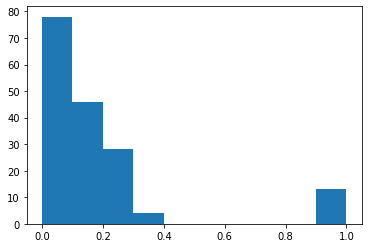

In [30]:
plt.hist(K_t.flatten())
plt.show()

In [31]:
np.save("termination_Y",Y)
np.save("termination_Ki",K_i)
np.save("termination_Kc",K_c)
np.save("termination_Kt",K_t)

In [57]:
df[['t_idx','t']].drop_duplicates().sort_values('t_idx')['t'].to_csv('t',index=False, header=None)
df[['i_idx','i']].drop_duplicates().sort_values('i_idx')['i'].to_csv('i',index=False, header=None)
df[['c_idx','c']].drop_duplicates().sort_values('c_idx')['c'].to_csv('c',index=False, header=None)

In [37]:
df[['tseq','t_idx']].drop_duplicates().sort_values('t_idx')['tseq'].to_csv('tseq',index=False, header=None)